# 1-5. データの可視化 - 関係性の可視化（ネットワーク構造）
[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用して，ネットワーク構造の可視化を行なってみよう．

## データセットの準備
以下では，[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用し，手塚治虫を作者に含むマンガ単行本と，出版社のネットワーク構造を可視化する．
上記のリンクから「マンガ単行本」の「.json」ファイルをダウンロードした後，このノートブックにアップロードしよう．

※「1-4. 単回帰分析」，「1-4. ロジスティック回帰分析」，「1-5. 1～3次元の図表化」,「1-5. 関係性の可視化（ネットワーク構造）」，「1-7. ソートアルゴリズム」，「1-7. 探索アルゴリズム」，「2-5. データ加工」，「3-3. 機械学習」は同じデータセットを利用するため，もし同じものを持っている場合は以下の取得作業は不要である．そちらをアップロードしよう．

ファイルサイズがとても大きいためアップロードには時間がかかる．ファイル名が反映されたことを確認するだけでなく，ファイルアップロード時の画面の下部にあるアップロードの進捗を示す円形のバーが全て進行するまで待ってから作業しよう．（およそ30分程度）

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
!pip install japanize-matplotlib
import japanize_matplotlib

json_open = open('/content/metadata_cm-item_cm101_00001.json', 'r')
json_load = json.load(json_open, strict=False)

## ネットワーク構造の可視化

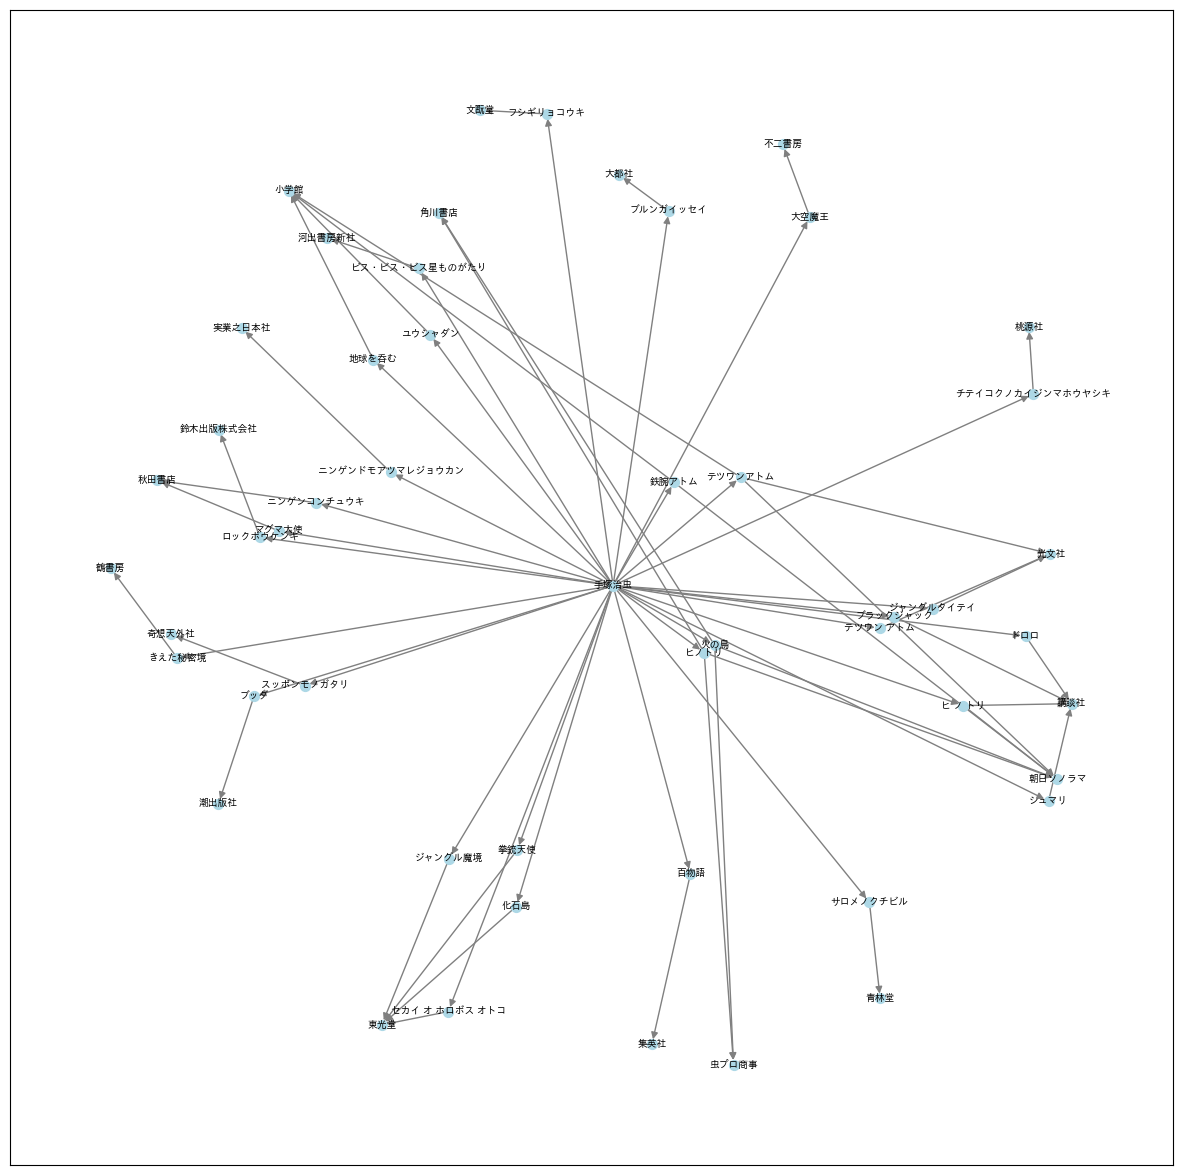

In [ ]:

#データ前処理
df = pd.DataFrame(json_load["@graph"])
df = df[["schema:creator","publisher","name"]] # 作者名，出版社，マンガ単行本名の列に絞る

df['publisher']=df['publisher'].apply(lambda x: str(x).split("　∥　")[0].split(",")[0].split("]")[-1])

df['schema:creator'] = df['schema:creator'].apply(lambda x: x[0]['@value'] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict) else x)
df['schema:creator'] = df['schema:creator'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
df['schema:creator']=df['schema:creator'].apply(lambda x: str(x).split("　∥　")[0].split(",")[0].split("]")[-1])

df['name'] = df['name'].apply(lambda x: x[0]['@value'] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict) else x)
df['name'] = df['name'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
df['name']=df['name'].apply(lambda x: str(x).split("　∥　")[0].split(",")[0].split("]")[-1])

df = df.dropna(subset=['schema:creator', 'publisher', 'name']) # 欠損値を削除
after_df = df[df['schema:creator']=='手塚治虫'] # 作者名が「手塚治虫」のデータのみに絞る

#グラフ構造を定義
G = nx.DiGraph()

# ノードの追加
nodes = set(after_df['schema:creator']) | set(after_df['name']) | set(after_df['publisher'])
G.add_nodes_from(nodes)

# エッジの追加
edges1 = zip(after_df['schema:creator'], after_df['name']) # 作者名のノードとマンガ単行本のノードを繋ぐエッジ
edges2 = zip(after_df['name'], after_df['publisher']) # マンガ単行本のノードと出版社のノードを繋ぐエッジ
G.add_edges_from(edges1)
G.add_edges_from(edges2)

# ネットワークの可視化
plt.figure(figsize=(15, 15))

# ネットワークの設定
pos = nx.spring_layout(G, seed=50, k=0.3, iterations=50)  # レイアウトアルゴリズムのパラメータを調整
nx.draw_networkx(G, pos, with_labels=True, font_family='IPAexGothic', font_size=7, node_size=50, node_color='lightblue', edge_color='gray', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_family='IPAexGothic', font_size=4)
#プロット
plt.show()